In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
data.drop(["CustomerID"],axis=1,inplace=True)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
data.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"Score", "Genre":"Gender"},inplace=True)
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
X = data[["Age", "Income", "Score"]]
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

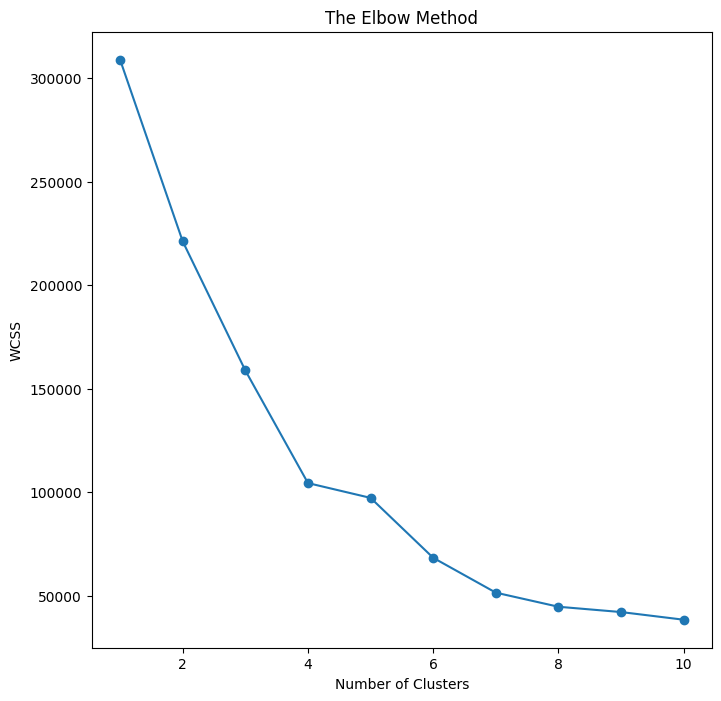

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
for val, i in enumerate(wcss):
  print("WCSS value: {} at K: {}".format(i, val+1))

WCSS value: 308812.7800000001 at K: 1
WCSS value: 221087.1962719298 at K: 2
WCSS value: 158744.97108013942 at K: 3
WCSS value: 104366.151455562 at K: 4
WCSS value: 97211.84353980474 at K: 5
WCSS value: 68275.94428646985 at K: 6
WCSS value: 51448.36126259325 at K: 7
WCSS value: 44640.028048530425 at K: 8
WCSS value: 42081.855308685335 at K: 9
WCSS value: 38378.73890793209 at K: 10


In [ ]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(data)
data['label'] = y_kmeans

data.corr()

,Gender,Age,Income,Score,label
Gender,1.000000,0.060867,0.056410,-0.058109,0.054509
Age,0.060867,1.000000,-0.012398,-0.327227,-0.067228
Income,0.056410,-0.012398,1.000000,0.009903,0.271085
Score,-0.058109,-0.327227,0.009903,1.000000,-0.253690
label,0.054509,-0.067228,0.271085,-0.253690,1.000000


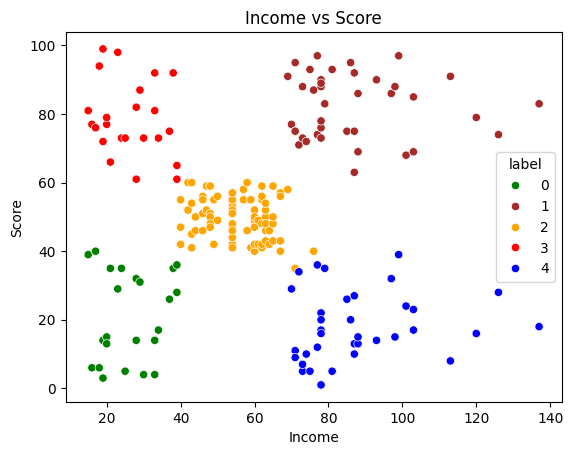

In [ ]:
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['label'], data=data, palette = ['green', 'brown', 'orange', 'red', 'blue'])
plt.title('Income vs Score')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

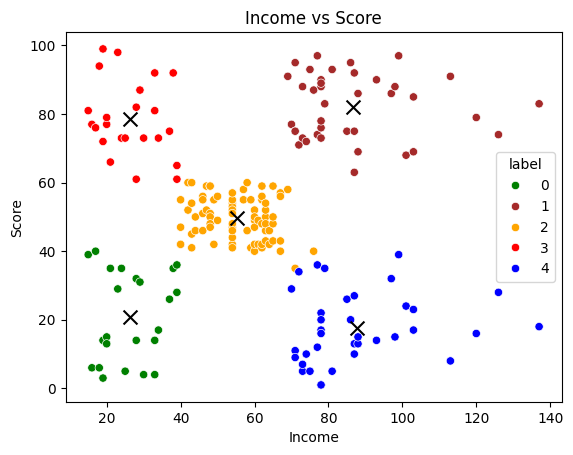

In [ ]:
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['label'], palette = ['green', 'brown', 'orange', 'red', 'blue'])
plt.title('Income vs Score')
plt.xlabel('Income')
plt.ylabel('Score')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3], color='black', marker='x', s=100)
plt.show()

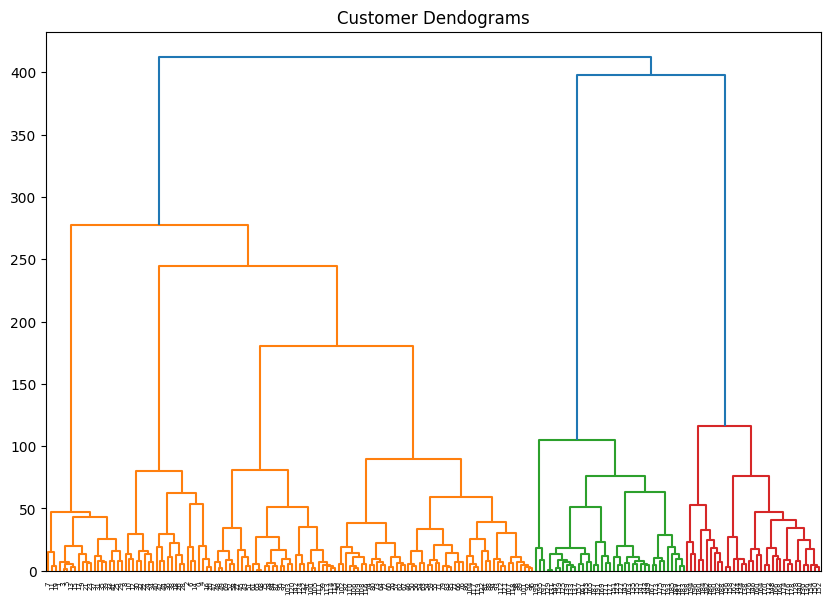

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_kmeans)

0.44428597560893024